In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_backup = pd.read_csv('D:/Desktop/Plan/Road_to_Swedbank/Credit_risk_modeling/accepted_2007_to_2018Q4.csv')

C:\Users\thdam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Explore dataset

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [6]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


## General Preprocesing

#### emp_length

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

In [10]:
type(loan_data['emp_length_int'][0])

str

In [11]:
loan_data['emp_length_int']=pd.to_numeric(loan_data['emp_length_int'])

In [12]:
type(loan_data['emp_length_int'][0])

numpy.float64

#### earliest_cr_line

In [13]:
loan_data['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
3    Sep-2008
4    Jun-1998
Name: earliest_cr_line, dtype: object

In [14]:
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%Y')

In [15]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
loan_data['earliest_cr_line_date'].head()

0   2003-08-01
1   1999-12-01
2   2000-08-01
3   2008-09-01
4   1998-06-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [17]:
loan_data['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2020-11-20')-loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [18]:
loan_data['mths_since_earliest_cr_line'].max()

1053.0

#### term

In [19]:
loan_data['term'].head()

0     36 months
1     36 months
2     60 months
3     60 months
4     60 months
Name: term, dtype: object

In [20]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [21]:
type(loan_data['term_int'][0])

numpy.float64

#### issue_d

In [22]:
loan_data['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
3    Dec-2015
4    Dec-2015
Name: issue_d, dtype: object

In [23]:
loan_data['issue_d_date']=pd.to_datetime(loan_data['issue_d'],format='%b-%Y')

In [24]:
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
loan_data['mths_since_issue_d']= round(pd.to_numeric((pd.to_datetime('2020-11-20')-loan_data['issue_d_date'])/np.timedelta64(1,'M')))

In [26]:
loan_data['mths_since_issue_d'].max()

162.0

#### Preprocessing few discrete variables

In [27]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [28]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [29]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [30]:
loan_data=pd.concat([loan_data,loan_data_dummies],axis=1) #concat by column

#### check for missing values and clean

In [31]:
pd.options.display.max_rows= None 
loan_data.isnull().sum()

id                                                                       0
member_id                                                          2260701
loan_amnt                                                               33
funded_amnt                                                             33
funded_amnt_inv                                                         33
term                                                                    33
int_rate                                                                33
installment                                                             33
grade                                                                   33
sub_grade                                                               33
emp_title                                                           167002
emp_length                                                          146940
home_ownership                                                          33
annual_inc               

In [32]:
pd.options.display.max_rows= 100

In [33]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [34]:
loan_data['total_rev_hi_lim'].isnull().sum()

33

In [35]:
loan_data.dropna(subset=['funded_amnt'], inplace=True)

In [36]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [37]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [38]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# PD model

## Data preparation

### Dependent variable

In [39]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [40]:
loan_data['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [41]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

In [42]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

### Split data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [45]:
loan_data_inputs_train.shape

(1808534, 284)

In [46]:
loan_data_targets_train.shape

(1808534,)

In [47]:
loan_data_inputs_test.shape

(452134, 284)

In [48]:
loan_data_targets_test.shape

(452134,)

### Preprocessing Dicrete Variables

Woe = ln(%good / %bad)

Information Value= sum((%good-%bad)*woe)

IV < 0.02 : no predictive power
0.02 < IV < 0.1: weak

In [49]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [50]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [51]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2418,0.604218,0.005348,1461.0,957.0,0.003709,0.016437,-1.488791,NaN,NaN,0.477604
1,F,8320,0.631010,0.018402,5250.0,3070.0,0.013328,0.052729,-1.375314,0.026791,0.113477,0.477604
2,E,27156,0.715164,0.060062,19421.0,7735.0,0.049303,0.132854,-0.991265,0.084155,0.384049,0.477604
3,D,64699,0.797091,0.143097,51571.0,13128.0,0.130920,0.225482,-0.543652,0.081927,0.447613,0.477604
4,C,130008,0.856547,0.287543,111358.0,18650.0,0.282698,0.320326,-0.124960,0.059456,0.418692,0.477604
5,B,133034,0.913082,0.294236,121471.0,11563.0,0.308371,0.198602,0.440001,0.056535,0.564961,0.477604
6,A,86499,0.963942,0.191313,83380.0,3119.0,0.211672,0.053571,1.374032,0.050859,0.934031,0.477604


### Preprocessing Discrete Variables: Visualizing Results

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [53]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

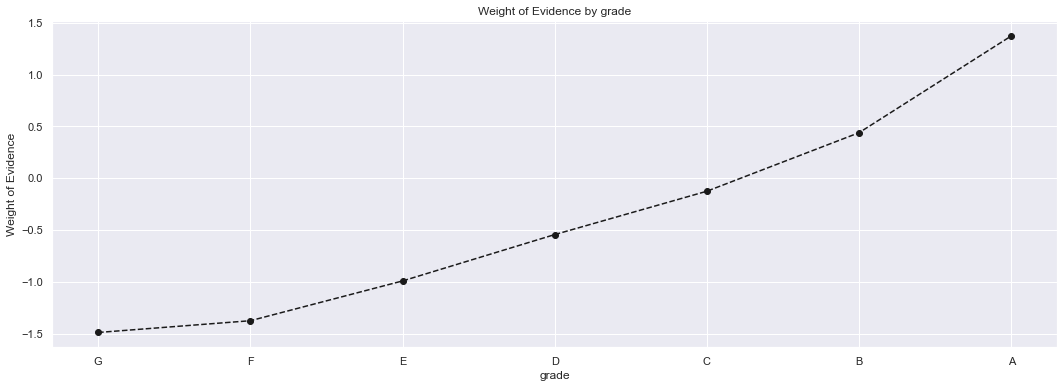

In [54]:
plot_by_woe(df_temp)

#### home_ownership

In [55]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,35,0.771429,0.000077,27.0,8.0,0.000069,0.000137,-0.695469,NaN,NaN,0.023259
1,NONE,6,0.833333,0.000013,5.0,1.0,0.000013,0.000017,-0.302426,0.061905,0.393043,0.023259
2,RENT,179443,0.851162,0.396880,152735.0,26708.0,0.387739,0.458727,-0.168123,0.017828,0.134303,0.023259
3,OWN,50191,0.869977,0.111009,43665.0,6526.0,0.110850,0.112088,-0.011112,0.018815,0.157011,0.023259
4,ANY,194,0.881443,0.000429,171.0,23.0,0.000434,0.000395,0.094305,0.011467,0.105417,0.023259
5,MORTGAGE,222265,0.887720,0.491591,197309.0,24956.0,0.500896,0.428635,0.155793,0.006276,0.061487,0.023259


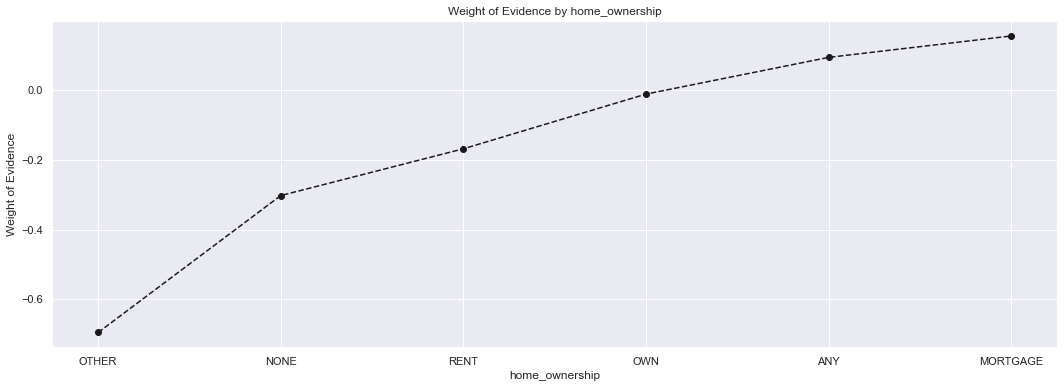

In [56]:
plot_by_woe(df_temp)

In [57]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

#### addr_state

In [58]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,LA,5114,0.834376,0.011311,4267.0,847.0,0.010832,0.014548,-0.294899,NaN,NaN,inf
1,AR,3423,0.845749,0.007571,2895.0,528.0,0.007349,0.009069,-0.210220,0.011373,0.084679,inf
2,AL,5427,0.845771,0.012003,4590.0,837.0,0.011652,0.014376,-0.210053,0.000022,0.000167,inf
3,MS,2540,0.848425,0.005618,2155.0,385.0,0.005471,0.006613,-0.189562,0.002654,0.020491,inf
4,OK,4171,0.848957,0.009225,3541.0,630.0,0.008989,0.010821,-0.185420,0.000532,0.004142,inf
5,NM,2352,0.850340,0.005202,2000.0,352.0,0.005077,0.006046,-0.174593,0.001383,0.010827,inf
6,SD,900,0.853333,0.001991,768.0,132.0,0.001950,0.002267,-0.150876,0.002993,0.023717,inf
7,NV,6449,0.857497,0.014263,5530.0,919.0,0.014039,0.015784,-0.117207,0.004164,0.033669,inf
8,FL,32549,0.859750,0.071990,27984.0,4565.0,0.071041,0.078407,-0.098650,0.002253,0.018557,inf
9,MO,7149,0.859841,0.015812,6147.0,1002.0,0.015605,0.017210,-0.097898,0.000091,0.000752,inf


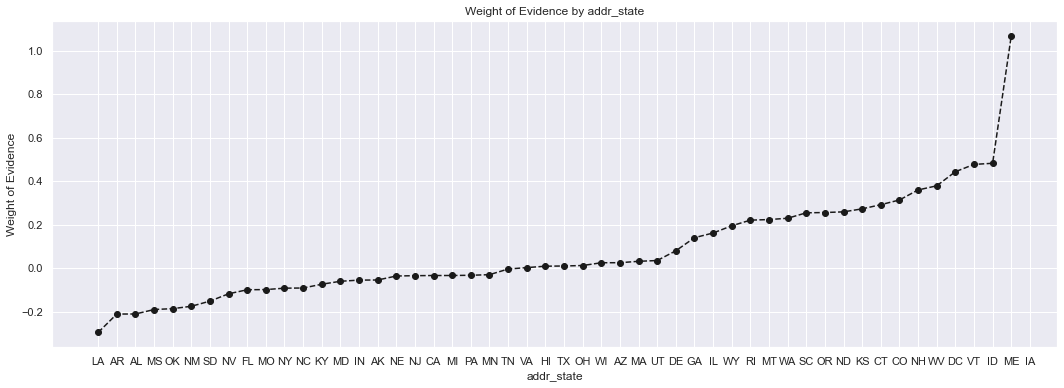

In [59]:
plot_by_woe(df_temp)

In [60]:
df_inputs_prepr['addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA'] = sum([df_inputs_prepr['addr_state:LA'], df_inputs_prepr['addr_state:AR'],
                                              df_inputs_prepr['addr_state:AL'], df_inputs_prepr['addr_state:MS'],
                                              df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:NM'],
                                                          df_inputs_prepr['addr_state:SD'],df_inputs_prepr['addr_state:NV'],
                                                               df_inputs_prepr['addr_state:IA']])

df_inputs_prepr['addr_state:MO_NC_MD_IN_AK_NE_NJ'] = sum([df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:NC'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:IN'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:MI_PA_MN_TN_VA_HI'] = sum([df_inputs_prepr['addr_state:MI'], df_inputs_prepr['addr_state:PA'],
                                              df_inputs_prepr['addr_state:MN'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:VA'],df_inputs_prepr['addr_state:HI']])

df_inputs_prepr['addr_state:OH_WI_AZ_MA_UT_DE'] = sum([df_inputs_prepr['addr_state:OH'], df_inputs_prepr['addr_state:WI'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:DE']])

df_inputs_prepr['addr_state:GA_IL_WY_RI'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:IL'],
                                              df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:RI']])

df_inputs_prepr['addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME'] = sum([df_inputs_prepr['addr_state:MT'], 
                                              df_inputs_prepr['addr_state:WA'],df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:OR'],df_inputs_prepr['addr_state:ND'],
                                              df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:CT'],
                                              df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:VT'],df_inputs_prepr['addr_state:ID'],
                                                                               df_inputs_prepr['addr_state:ME']])


#### verification_status

In [61]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,125969,0.829633,0.278610,104508.0,21461.0,0.265308,0.368606,-0.328838,NaN,NaN,0.084096
1,Source Verified,177405,0.867011,0.392373,153812.0,23593.0,0.390473,0.405225,-0.037083,0.037378,0.291755,0.084096
2,Not Verified,148760,0.911482,0.329018,135592.0,13168.0,0.344219,0.226169,0.419996,0.044471,0.457080,0.084096


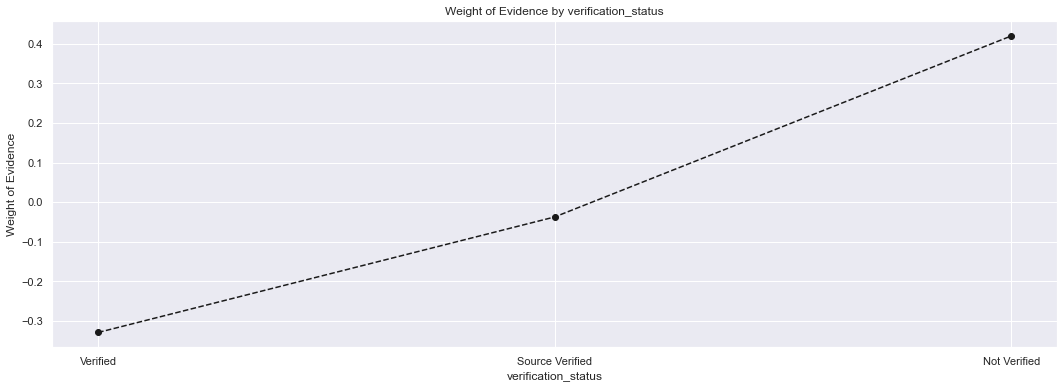

In [62]:
plot_by_woe(df_temp)

#### purpose

In [63]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,74,0.783784,0.000164,58.0,16.0,0.000147,0.000275,-0.624010,NaN,NaN,0.021791
1,renewable_energy,281,0.800712,0.000621,225.0,56.0,0.000571,0.000962,-0.521116,0.016928,0.102894,0.021791
2,small_business,4908,0.807457,0.010855,3963.0,945.0,0.010061,0.016231,-0.478293,0.006745,0.042823,0.021791
3,moving,3101,0.845856,0.006859,2623.0,478.0,0.006659,0.008210,-0.209401,0.038399,0.268892,0.021791
4,debt_consolidation,255440,0.860539,0.564965,219816.0,35624.0,0.558033,0.611865,-0.092093,0.014683,0.117308,0.021791
5,medical,5507,0.868713,0.012180,4784.0,723.0,0.012145,0.012418,-0.022241,0.008174,0.069852,0.021791
6,other,27758,0.870560,0.061393,24165.0,3593.0,0.061346,0.061712,-0.005946,0.001847,0.016295,0.021791
7,house,2873,0.870867,0.006354,2502.0,371.0,0.006352,0.006372,-0.003221,0.000307,0.002726,0.021791
8,wedding,455,0.872527,0.001006,397.0,58.0,0.001008,0.000996,0.011629,0.001661,0.014850,0.021791
9,major_purchase,10040,0.881574,0.022206,8851.0,1189.0,0.022469,0.020422,0.095554,0.009046,0.083925,0.021791


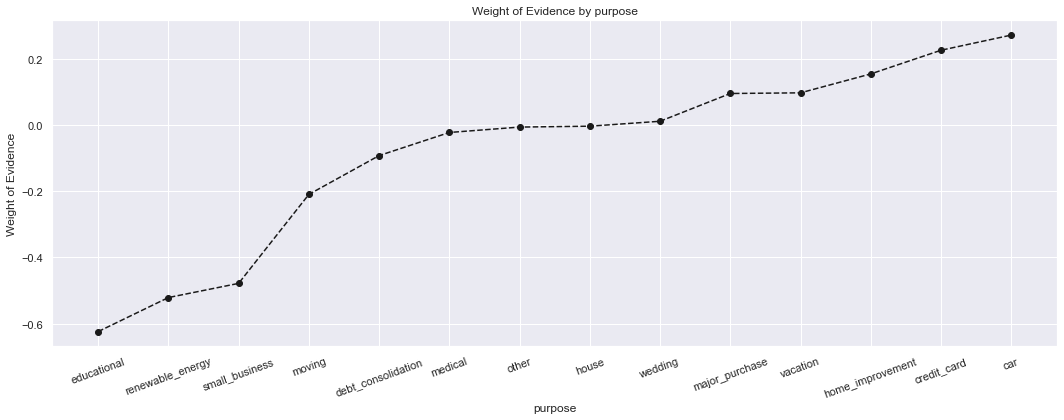

In [64]:
plot_by_woe(df_temp,20)

In [65]:
df_inputs_prepr['purpose:educ__ren_en__sm_b__mov'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                          df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving']])
                                
df_inputs_prepr['purpose:med__oth__house__wedd'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                       df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:wedding']])
df_inputs_prepr['purpose:major_purch__vacation__home_impr__car'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:vacation']])

#### initial_list_status

In [66]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,144935,0.841791,0.320558,122005.0,22930.0,0.309727,0.393837,-0.240248,NaN,NaN,0.031137
1,w,307199,0.885117,0.679442,271907.0,35292.0,0.690273,0.606163,0.129940,0.043326,0.370188,0.031137


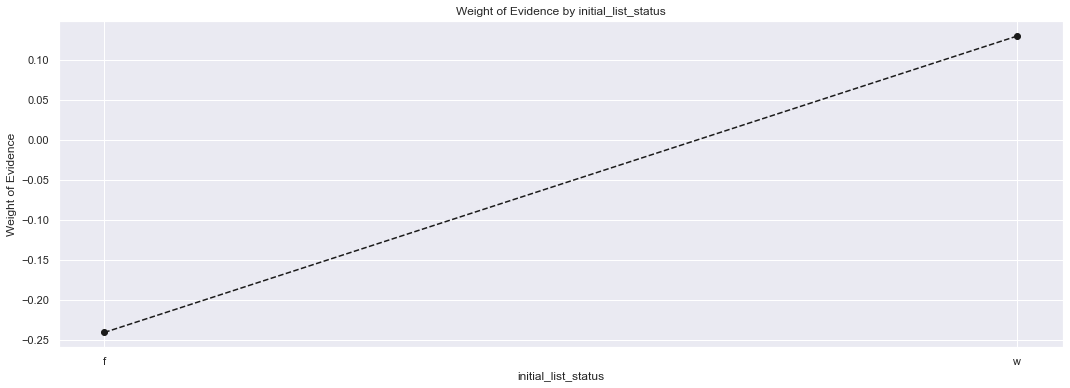

In [67]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables

In [68]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.

#### term

In [69]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36.0,322023,0.890424,0.712229,286737.0,35286.0,0.727921,0.60606,0.183215,NaN,NaN,0.067429
1,60.0,130111,0.823720,0.287771,107175.0,22936.0,0.272079,0.39394,-0.370109,0.066704,0.553324,0.067429


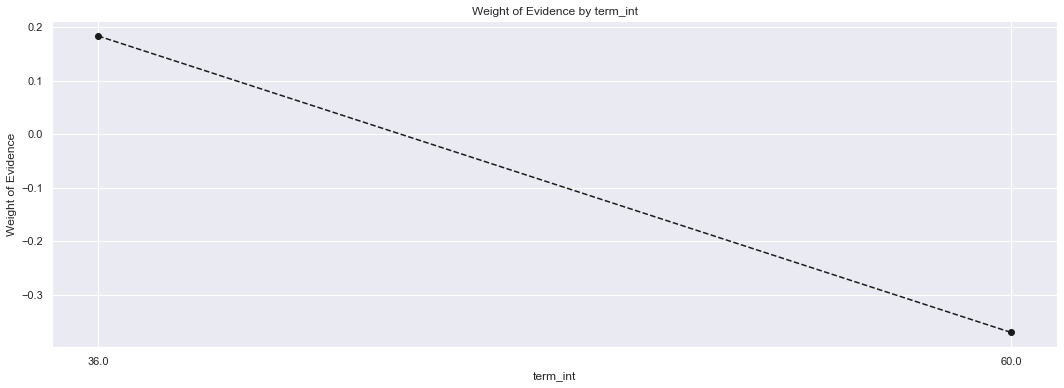

In [70]:
plot_by_woe(df_temp)

In [71]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

#### emp_length

In [72]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,67578,0.858179,0.149465,57994.0,9584.0,0.147226,0.164611,-0.111620,NaN,NaN,0.004543
1,1.0,29588,0.867074,0.065441,25655.0,3933.0,0.065129,0.067552,-0.036528,0.008896,0.075091,0.004543
2,2.0,40890,0.870849,0.090438,35609.0,5281.0,0.090398,0.090705,-0.003381,0.003774,0.033147,0.004543
3,3.0,35982,0.870213,0.079583,31312.0,4670.0,0.079490,0.080210,-0.009022,0.000636,0.005641,0.004543
4,4.0,27399,0.872076,0.060599,23894.0,3505.0,0.060658,0.060201,0.007573,0.001863,0.016595,0.004543
5,5.0,27863,0.875031,0.061626,24381.0,3482.0,0.061895,0.059806,0.034333,0.002956,0.026760,0.004543
6,6.0,20232,0.875247,0.044748,17708.0,2524.0,0.044954,0.043351,0.036307,0.000216,0.001974,0.004543
7,7.0,18677,0.865449,0.041309,16164.0,2513.0,0.041035,0.043162,-0.050555,0.009798,0.086862,0.004543
8,8.0,18384,0.859389,0.040661,15799.0,2585.0,0.040108,0.044399,-0.101643,0.006061,0.051088,0.004543
9,9.0,15994,0.868138,0.035374,13885.0,2109.0,0.035249,0.036223,-0.027269,0.008749,0.074374,0.004543


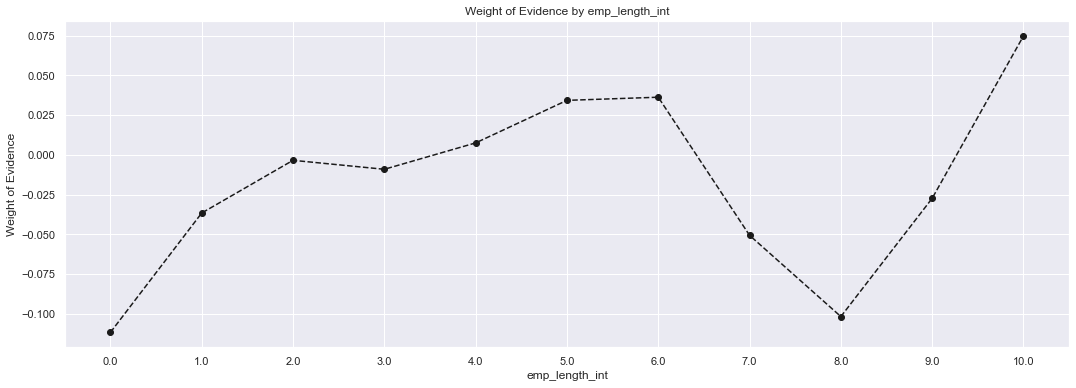

In [73]:
plot_by_woe(df_temp)

In [74]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

#### mths_since_issue_d

In [75]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 84.,  55.,  42.,  47.,  39.,  38.,  61.,  24.,  85.,  35.,  78.,
        59.,  40.,  25.,  77.,  57.,  62.,  27.,  88.,  31.,  70.,  66.,
        26.,  97.,  76.,  33.,  53.,  37., 101.,  32.,  74.,  48.,  34.,
        54., 118.,  63.,  51.,  64.,  58.,  69.,  29.,  52.,  36.,  80.,
        44.,  89.,  60.,  71.,  41.,  65.,  83.,  99.,  30.,  95.,  67.,
        79.,  49.,  82.,  68.,  56.,  92., 126.,  46.,  87., 125.,  28.,
        73.,  43.,  86., 142.,  81., 113., 122., 102.,  45.,  50.,  90.,
        96.,  93., 107.,  91.,  75., 152., 127.,  72., 133.,  94., 100.,
       108., 109., 129., 120., 132., 119., 110.,  98., 150., 103., 116.,
       131., 154., 114., 123., 115., 105., 156., 112., 104., 153., 130.,
       137., 117., 106., 124., 128., 121., 146., 111., 140., 143., 144.,
       149., 136., 138., 134., 161., 158., 160., 155., 135., 139., 145.,
       159., 141., 151., 148., 147., 157., 162.])

In [76]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [77]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(23.862, 26.76]",25753,0.991535,0.056959,25535.0,218.0,0.064824,0.003744,2.851446,NaN,NaN,0.454816
1,"(26.76, 29.52]",25637,0.978742,0.056702,25092.0,545.0,0.063700,0.009361,1.917654,0.012793,0.933792,0.454816
2,"(29.52, 32.28]",26343,0.955738,0.058264,25177.0,1166.0,0.063915,0.020027,1.160488,0.023004,0.757167,0.454816
3,"(32.28, 35.04]",21633,0.938797,0.047846,20309.0,1324.0,0.051557,0.022741,0.818542,0.016941,0.341945,0.454816
4,"(35.04, 37.8]",16191,0.922117,0.035810,14930.0,1261.0,0.037902,0.021658,0.559603,0.016680,0.258939,0.454816
5,"(37.8, 40.56]",24241,0.904006,0.053615,21914.0,2327.0,0.055632,0.039968,0.330682,0.018112,0.228922,0.454816
6,"(40.56, 43.32]",22970,0.885372,0.050804,20337.0,2633.0,0.051628,0.045223,0.132454,0.018633,0.198228,0.454816
7,"(43.32, 46.08]",18972,0.877978,0.041961,16657.0,2315.0,0.042286,0.039762,0.061557,0.007394,0.070897,0.454816
8,"(46.08, 48.84]",13636,0.858976,0.030159,11713.0,1923.0,0.029735,0.033029,-0.105051,0.019002,0.166608,0.454816
9,"(48.84, 51.6]",18926,0.847564,0.041859,16041.0,2885.0,0.040722,0.049552,-0.196241,0.011412,0.091190,0.454816


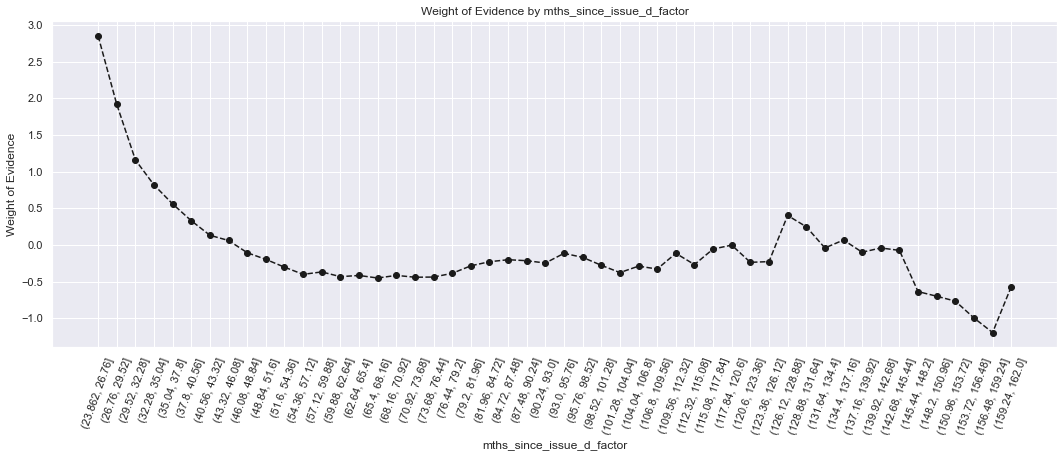

In [78]:
plot_by_woe(df_temp,70)

In [79]:
df_inputs_prepr['mths_since_issue_d:<30'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(30)), 1, 0)
df_inputs_prepr['mths_since_issue_d:30-33'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(30, 34)), 1, 0)
df_inputs_prepr['mths_since_issue_d:33-40'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(33, 41)), 1, 0)
df_inputs_prepr['mths_since_issue_d:41-46'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(41, 47)), 1, 0)
df_inputs_prepr['mths_since_issue_d:46-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(46, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

#### int_rate

In [80]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [81]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",11264,0.978782,0.024913,11025.0,239.0,0.027988,0.004105,1.919593,NaN,NaN,0.463929
1,"(5.824, 6.337]",9763,0.981358,0.021593,9581.0,182.0,0.024323,0.003126,2.051666,0.002576,0.132073,0.463929
2,"(6.337, 6.851]",10433,0.972108,0.023075,10142.0,291.0,0.025747,0.004998,1.639253,0.009250,0.412413,0.463929
3,"(6.851, 7.364]",19032,0.964113,0.042094,18349.0,683.0,0.046581,0.011731,1.378971,0.007995,0.260282,0.463929
4,"(7.364, 7.878]",10963,0.961963,0.024247,10546.0,417.0,0.026772,0.007162,1.318551,0.002150,0.060420,0.463929
5,"(7.878, 8.392]",27432,0.935513,0.060672,25663.0,1769.0,0.065149,0.030384,0.762772,0.026450,0.555780,0.463929
6,"(8.392, 8.905]",7471,0.949806,0.016524,7096.0,375.0,0.018014,0.006441,1.028496,0.014293,0.265725,0.463929
7,"(8.905, 9.419]",9382,0.901620,0.020750,8459.0,923.0,0.021474,0.015853,0.303493,0.048186,0.725003,0.463929
8,"(9.419, 9.932]",20036,0.935566,0.044314,18745.0,1291.0,0.047587,0.022174,0.763646,0.033946,0.460153,0.463929
9,"(9.932, 10.446]",15750,0.929460,0.034835,14639.0,1111.0,0.037163,0.019082,0.666564,0.006106,0.097081,0.463929


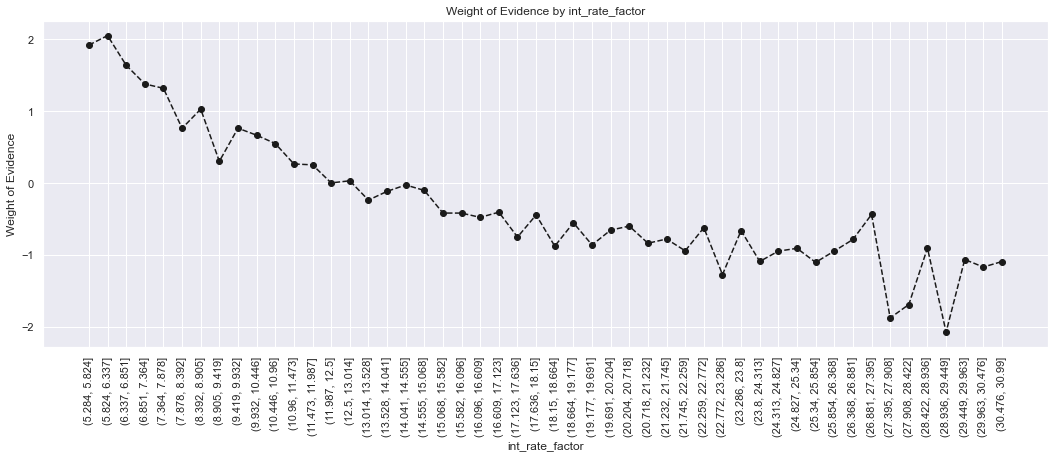

In [82]:
plot_by_woe(df_temp, 90)

In [83]:
df_inputs_prepr['int_rate:<8.392'] = np.where((df_inputs_prepr['int_rate'] <= 8.392), 1, 0)
df_inputs_prepr['int_rate:8.392-11.987'] = np.where((df_inputs_prepr['int_rate'] > 8.392) & (df_inputs_prepr['int_rate'] <= 11.987), 1, 0)
df_inputs_prepr['int_rate:11.987-15.582'] = np.where((df_inputs_prepr['int_rate'] > 11.987) & (df_inputs_prepr['int_rate'] <= 15.582), 1, 0)
df_inputs_prepr['int_rate:15.582-19.177'] = np.where((df_inputs_prepr['int_rate'] > 15.582) & (df_inputs_prepr['int_rate'] <= 19.177), 1, 0)
df_inputs_prepr['int_rate:>19.177'] = np.where((df_inputs_prepr['int_rate'] > 19.177), 1, 0)

#### funded_amnt 
Woe very vary

In [84]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",2840,0.918310,0.006281,2608.0,232.0,0.006621,0.003985,0.507737,NaN,NaN,0.041917
1,"(1290.0, 2080.0]",6234,0.909849,0.013788,5672.0,562.0,0.014399,0.009653,0.399931,0.008461,0.107806,0.041917
2,"(2080.0, 2870.0]",5654,0.902370,0.012505,5102.0,552.0,0.012952,0.009481,0.311976,0.007479,0.087955,0.041917
3,"(2870.0, 3660.0]",12551,0.896502,0.027759,11252.0,1299.0,0.028565,0.022311,0.247087,0.005868,0.064889,0.041917
4,"(3660.0, 4450.0]",9994,0.888433,0.022104,8879.0,1115.0,0.022541,0.019151,0.162970,0.008069,0.084117,0.041917
5,"(4450.0, 5240.0]",23520,0.887755,0.052020,20880.0,2640.0,0.053007,0.045344,0.156149,0.000678,0.006822,0.041917
6,"(5240.0, 6030.0]",21128,0.893080,0.046730,18869.0,2259.0,0.047902,0.038800,0.210734,0.005325,0.054585,0.041917
7,"(6030.0, 6820.0]",6846,0.873795,0.015142,5982.0,864.0,0.015186,0.014840,0.023073,0.019285,0.187661,0.041917
8,"(6820.0, 7610.0]",16026,0.882503,0.035445,14143.0,1883.0,0.035904,0.032342,0.104489,0.008709,0.081416,0.041917
9,"(7610.0, 8400.0]",20308,0.879259,0.044916,17856.0,2452.0,0.045330,0.042115,0.073571,0.003244,0.030918,0.041917


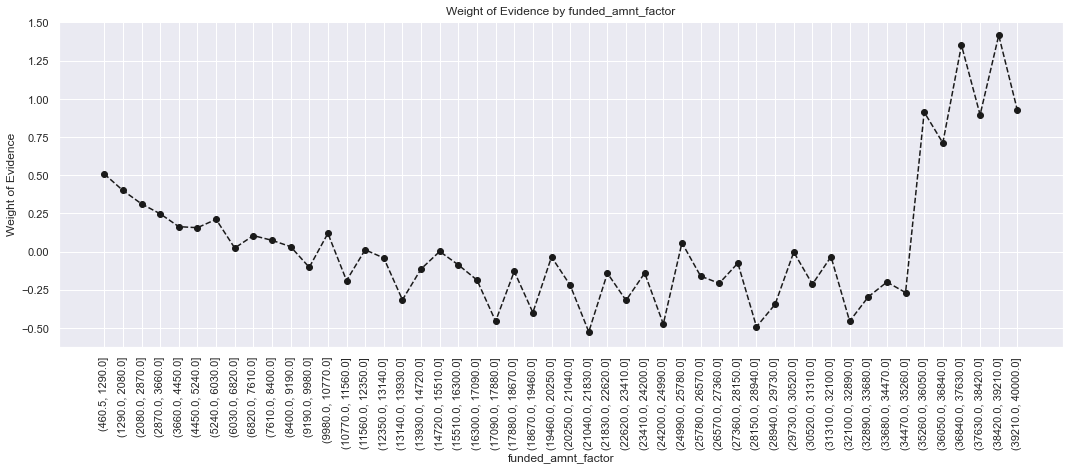

In [85]:
plot_by_woe(df_temp, 90)

#### mths_since_earliest_cr_line

In [86]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.042, 20.84]",7,1.000000,0.000015,7.0,0.0,0.000018,0.000000,inf,NaN,NaN,inf
1,"(20.84, 41.68]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(41.68, 62.52]",27,1.000000,0.000060,27.0,0.0,0.000069,0.000000,inf,NaN,NaN,inf
3,"(62.52, 83.36]",4034,0.941745,0.008922,3799.0,235.0,0.009644,0.004036,0.871043,0.058255,inf,inf
4,"(83.36, 104.2]",8804,0.897660,0.019472,7903.0,901.0,0.020063,0.015475,0.259628,0.044085,0.611415,inf
5,"(104.2, 125.04]",13910,0.879080,0.030765,12228.0,1682.0,0.031042,0.028889,0.071881,0.018580,0.187748,inf
6,"(125.04, 145.88]",12571,0.876541,0.027804,11019.0,1552.0,0.027973,0.026657,0.048212,0.002539,0.023668,inf
7,"(145.88, 166.72]",28681,0.876085,0.063435,25127.0,3554.0,0.063788,0.061042,0.044005,0.000456,0.004207,inf
8,"(166.72, 187.56]",45715,0.872777,0.101109,39899.0,5816.0,0.101289,0.099894,0.013874,0.003308,0.030131,inf
9,"(187.56, 208.4]",50599,0.860985,0.111912,43565.0,7034.0,0.110596,0.120813,-0.088366,0.011792,0.102240,inf


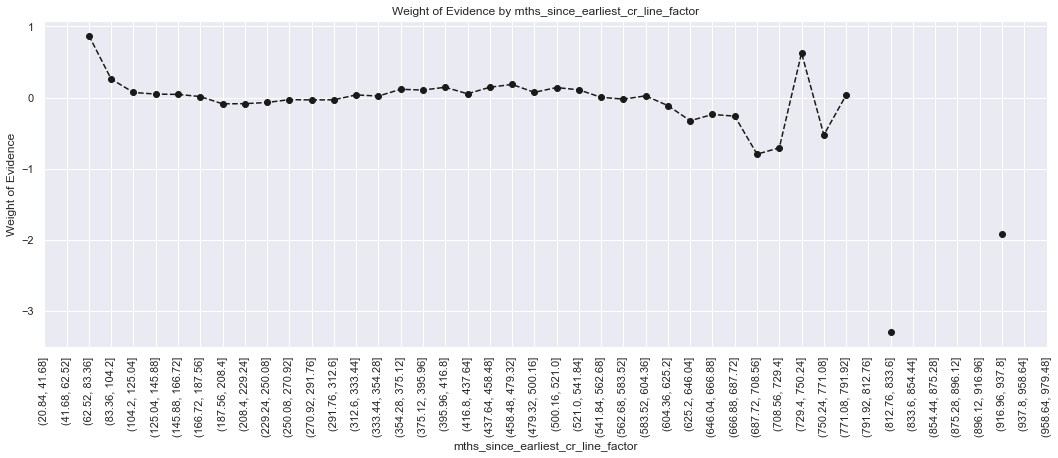

In [87]:
plot_by_woe(df_temp, 90)

In [88]:
df_inputs_prepr['mths_since_earliest_cr_line:<167'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(167)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:167-250'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(167, 251)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:251-355'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(251, 356)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:356-417'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(356, 418)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>417'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(417, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

#### delinq_2yrs

In [89]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,367724,0.874670,0.813308,321637.0,46087.0,0.816520,0.791574,0.031028,NaN,NaN,inf
1,1.0,56284,0.860777,0.124485,48448.0,7836.0,0.122992,0.134588,-0.090102,0.013892,0.121130,inf
2,2.0,16334,0.850067,0.036126,13885.0,2449.0,0.035249,0.042063,-0.176735,0.010710,0.086633,inf
3,3.0,5892,0.841989,0.013032,4961.0,931.0,0.012594,0.015991,-0.238761,0.008078,0.062026,inf
4,4.0,2642,0.850492,0.005843,2247.0,395.0,0.005704,0.006784,-0.173399,0.008503,0.065362,inf
5,5.0,1336,0.842066,0.002955,1125.0,211.0,0.002856,0.003624,-0.238184,0.008426,0.064785,inf
6,6.0,737,0.848033,0.001630,625.0,112.0,0.001587,0.001924,-0.192611,0.005967,0.045573,inf
7,7.0,420,0.807143,0.000929,339.0,81.0,0.000861,0.001391,-0.480313,0.040890,0.287702,inf
8,8.0,248,0.850806,0.000549,211.0,37.0,0.000536,0.000635,-0.170924,0.043664,0.309389,inf
9,9.0,169,0.846154,0.000374,143.0,26.0,0.000363,0.000447,-0.207116,0.004653,0.036192,inf


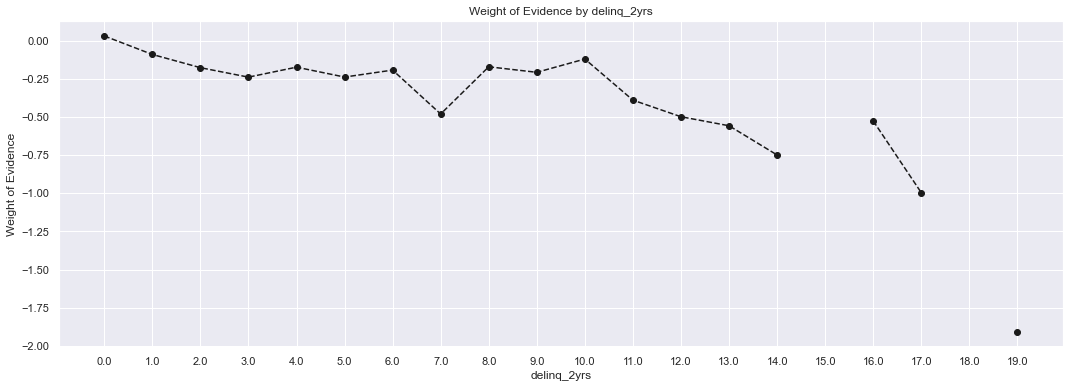

In [90]:
plot_by_woe(df_temp)

In [91]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4), 1, 0)

#### inq_last_6mths

In [92]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,276865,0.890961,0.612352,246676.0,30189.0,0.626221,0.518515,0.188734,NaN,NaN,inf
1,1.0,116470,0.854924,0.257601,99573.0,16897.0,0.252780,0.290217,-0.138109,0.036037,0.326843,inf
2,2.0,40026,0.822740,0.088527,32931.0,7095.0,0.083600,0.121861,-0.376840,0.032184,0.238731,inf
3,3.0,13739,0.793726,0.030387,10905.0,2834.0,0.027684,0.048676,-0.564332,0.029014,0.187492,inf
4,4.0,3488,0.767202,0.007715,2676.0,812.0,0.006793,0.013947,-0.719286,0.026524,0.154954,inf
5,5.0,1206,0.757048,0.002667,913.0,293.0,0.002318,0.005032,-0.775301,0.010154,0.056015,inf
6,6.0,247,0.744939,0.000546,184.0,63.0,0.000467,0.001082,-0.840063,0.012109,0.064762,inf
7,7.0,36,0.555556,0.000080,20.0,16.0,0.000051,0.000275,-1.688721,0.189384,0.848657,inf
8,8.0,29,0.482759,0.000064,14.0,15.0,0.000036,0.000258,-1.980857,0.072797,0.292136,inf
9,9.0,9,0.888889,0.000020,8.0,1.0,0.000020,0.000017,0.167577,0.406130,2.148434,inf


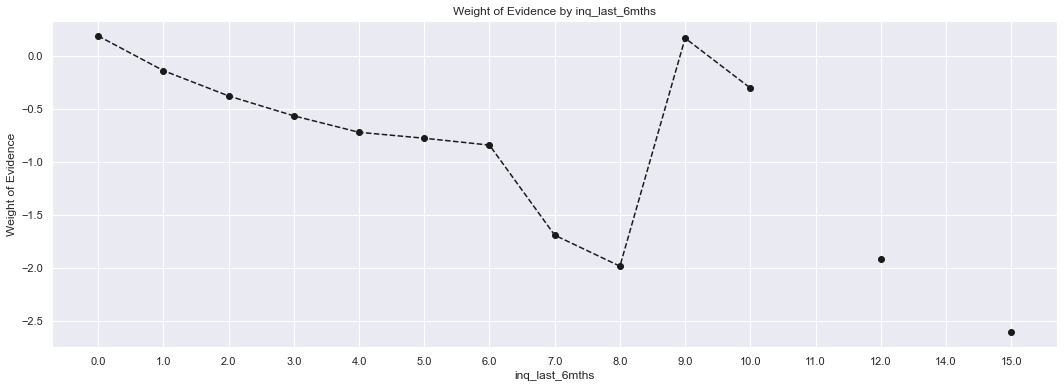

In [93]:
plot_by_woe(df_temp)

In [94]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

#### open_acc

In [95]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,19,0.894737,0.000042,17.0,2.0,0.000043,0.000034,0.228202,NaN,NaN,inf
1,1.0,323,0.900929,0.000714,291.0,32.0,0.000739,0.000550,0.295723,0.006192,0.067521,inf
2,2.0,2149,0.891577,0.004753,1916.0,233.0,0.004864,0.004002,0.195092,0.009351,0.100631,inf
3,3.0,6477,0.891308,0.014325,5773.0,704.0,0.014656,0.012092,0.192305,0.000270,0.002788,inf
4,4.0,13559,0.889667,0.029989,12063.0,1496.0,0.030624,0.025695,0.175484,0.001640,0.016821,inf
5,5.0,21881,0.884512,0.048395,19354.0,2527.0,0.049133,0.043403,0.124002,0.005156,0.051482,inf
6,6.0,29030,0.882225,0.064207,25611.0,3419.0,0.065017,0.058724,0.101810,0.002286,0.022192,inf
7,7.0,34612,0.879319,0.076553,30435.0,4177.0,0.077263,0.071743,0.074136,0.002906,0.027674,inf
8,8.0,37724,0.876180,0.083435,33053.0,4671.0,0.083910,0.080227,0.044875,0.003140,0.029261,inf
9,9.0,38947,0.871415,0.086140,33939.0,5008.0,0.086159,0.086016,0.001664,0.004765,0.043211,inf


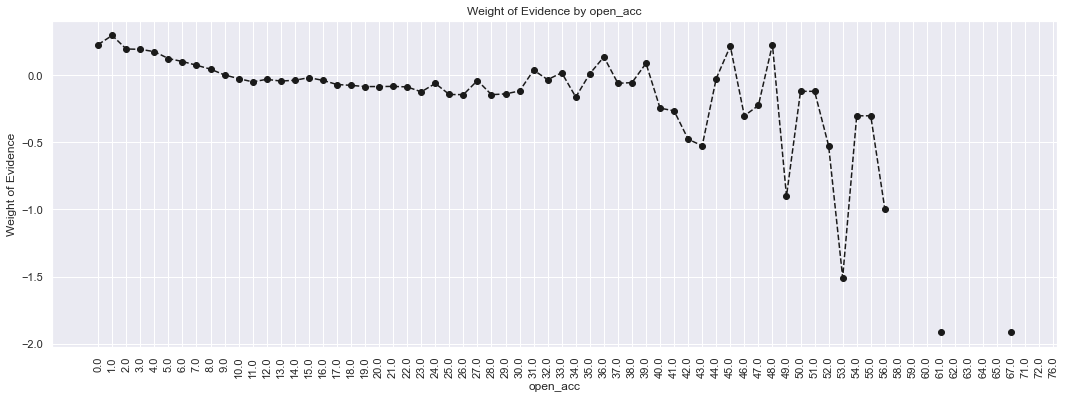

In [96]:
plot_by_woe(df_temp,90)

In [97]:
df_inputs_prepr['open_acc:0-3'] = np.where((df_inputs_prepr['open_acc'] >= 0) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

#### pub_rec

In [98]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,380891,0.876484,0.842429,333845.0,47046.0,0.847512,0.808045,0.047687,NaN,NaN,inf
1,1.0,60882,0.846129,0.134655,51514.0,9368.0,0.130775,0.160901,-0.207310,0.030356,0.254997,inf
2,2.0,6694,0.822528,0.014805,5506.0,1188.0,0.013978,0.020405,-0.378297,0.023601,0.170987,inf
3,3.0,2137,0.833879,0.004726,1782.0,355.0,0.004524,0.006097,-0.298490,0.011352,0.079807,inf
4,4.0,758,0.821900,0.001676,623.0,135.0,0.001582,0.002319,-0.382593,0.011980,0.084102,inf
5,5.0,371,0.835580,0.000821,310.0,61.0,0.000787,0.001048,-0.286166,0.013680,0.096427,inf
6,6.0,170,0.817647,0.000376,139.0,31.0,0.000353,0.000532,-0.411378,0.017932,0.125212,inf
7,7.0,99,0.828283,0.000219,82.0,17.0,0.000208,0.000292,-0.338358,0.010636,0.073019,inf
8,8.0,42,0.880952,0.000093,37.0,5.0,0.000094,0.000086,0.089616,0.052670,0.427974,inf
9,9.0,34,0.794118,0.000075,27.0,7.0,0.000069,0.000120,-0.561938,0.086835,0.651553,inf


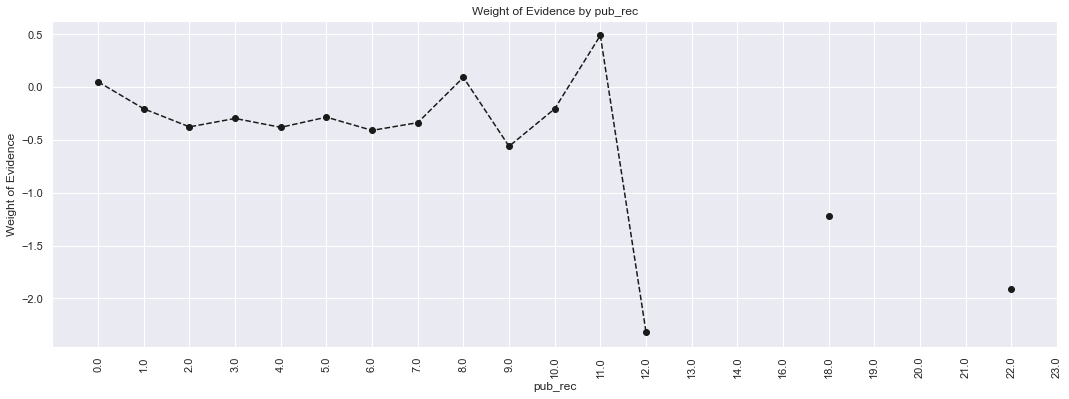

In [99]:
plot_by_woe(df_temp, 90)

In [100]:
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] == 0), 1, 0)
df_inputs_prepr['pub_rec:1-2'] = np.where((df_inputs_prepr['pub_rec'] >= 1) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:>=3'] = np.where((df_inputs_prepr['pub_rec'] >= 3), 1, 0)

#### total_acc

In [101]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.165, 3.3]",1140,0.898246,0.002521,1024.0,116.0,0.002600,0.001992,0.266017,NaN,NaN,inf
1,"(3.3, 6.6]",10326,0.880786,0.022838,9095.0,1231.0,0.023089,0.021143,0.088034,0.017459,0.177984,inf
2,"(6.6, 9.9]",23257,0.882401,0.051438,20522.0,2735.0,0.052098,0.046975,0.103502,0.001615,0.015468,inf
3,"(9.9, 13.2]",49400,0.875668,0.109260,43258.0,6142.0,0.109816,0.105493,0.040168,0.006733,0.063334,inf
4,"(13.2, 16.5]",46554,0.874554,0.102965,40714.0,5840.0,0.103358,0.100306,0.029977,0.001114,0.010191,inf
5,"(16.5, 19.8]",48935,0.872852,0.108231,42713.0,6222.0,0.108433,0.106867,0.014548,0.001703,0.015429,inf
6,"(19.8, 23.1]",64112,0.872536,0.141799,55940.0,8172.0,0.142011,0.140359,0.011702,0.000316,0.002846,inf
7,"(23.1, 26.4]",43623,0.869175,0.096482,37916.0,5707.0,0.096255,0.098021,-0.018185,0.003361,0.029886,inf
8,"(26.4, 29.7]",37357,0.869743,0.082624,32491.0,4866.0,0.082483,0.083577,-0.013173,0.000569,0.005011,inf
9,"(29.7, 33.0]",39689,0.868981,0.087781,34489.0,5200.0,0.087555,0.089313,-0.019882,0.000762,0.006709,inf


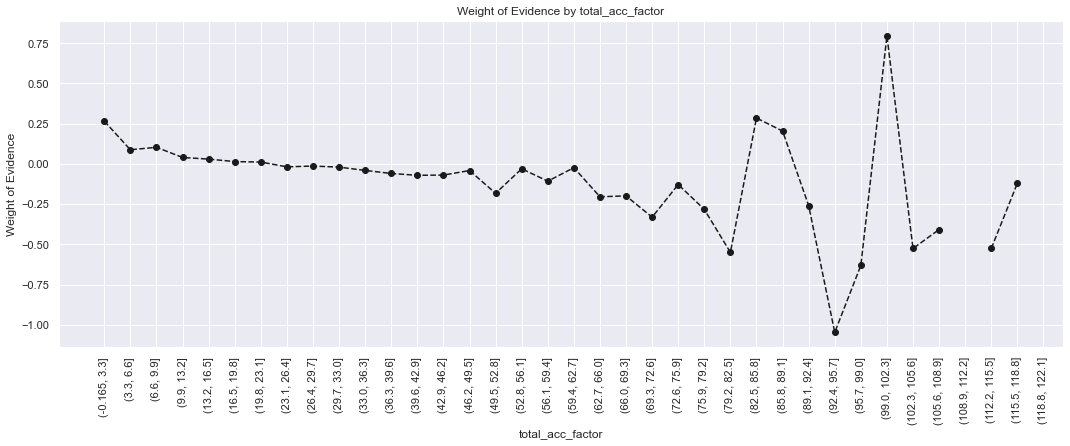

In [102]:
plot_by_woe(df_temp, 90)

In [103]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

#### acc_now_delinq

In [104]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,450433,0.871377,0.996238,392497.0,57936.0,0.996408,0.995088,0.001326,NaN,NaN,inf
1,1.0,1602,0.832085,0.003543,1333.0,269.0,0.003384,0.004620,-0.311388,0.039292,0.312714,inf
2,2.0,83,0.843373,0.000184,70.0,13.0,0.000178,0.000223,-0.228318,0.011289,0.083070,inf
3,3.0,12,0.833333,0.000027,10.0,2.0,0.000025,0.000034,-0.302426,0.010040,0.074108,inf
4,4.0,3,0.666667,0.000007,2.0,1.0,0.000005,0.000017,-1.218717,0.166667,0.916291,inf
5,6.0,1,0.000000,0.000002,0.0,1.0,0.000000,0.000017,-inf,0.666667,inf,inf


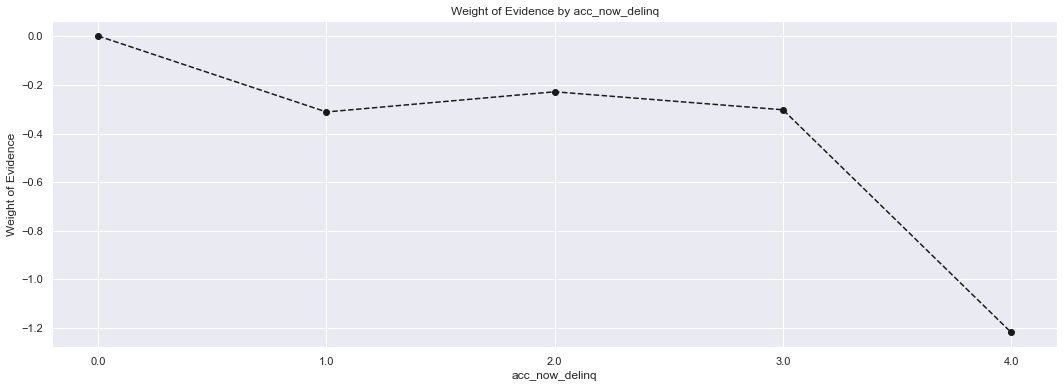

In [105]:
plot_by_woe(df_temp)

In [106]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

#### total_rev_hi_lim

In [107]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",17134,0.846562,0.037896,14505.0,2629.0,0.036823,0.045155,-0.203974,NaN,NaN,inf
1,"(5000.0, 9999.999]",47117,0.849799,0.104210,40040.0,7077.0,0.101647,0.121552,-0.178835,0.003237,0.025139,inf
2,"(9999.999, 14999.998]",58208,0.851945,0.128741,49590.0,8618.0,0.125891,0.148020,-0.161928,0.002145,0.016907,inf
3,"(14999.998, 19999.998]",55943,0.855317,0.123731,47849.0,8094.0,0.121471,0.139020,-0.134937,0.003372,0.026991,inf
4,"(19999.998, 24999.997]",48835,0.861001,0.108010,42047.0,6788.0,0.106742,0.116588,-0.088233,0.005684,0.046705,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


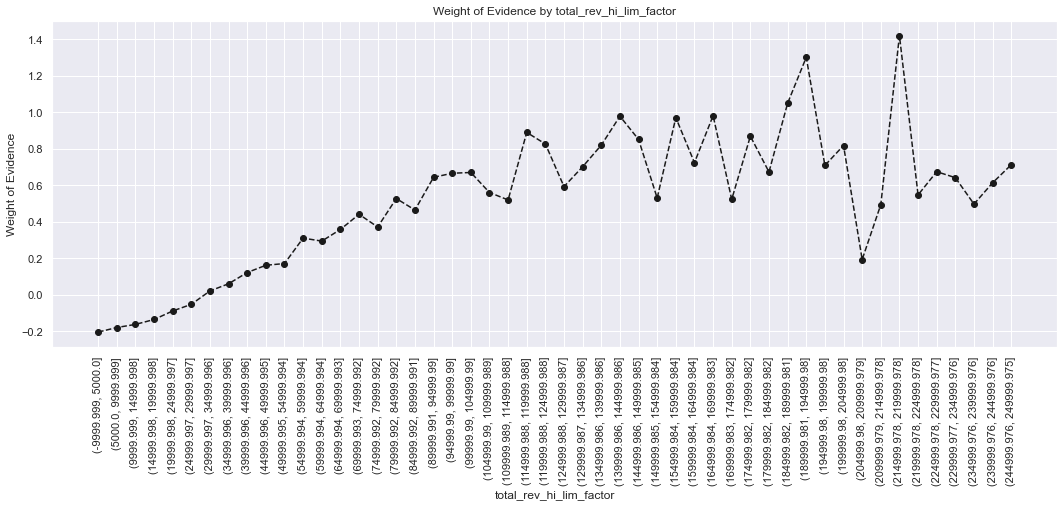

In [108]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [109]:
df_inputs_prepr['total_rev_hi_lim:<=10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

#### annual_inc

In [110]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-61000.0, 1220000.0]",452051,0.871225,0.999816,393838.0,58213.0,0.999812,0.999845,-0.000033,NaN,NaN,inf
1,"(1220000.0, 2440000.0]",54,0.925926,0.000119,50.0,4.0,0.000127,0.000069,0.613864,0.054701,0.613898,inf
2,"(2440000.0, 3660000.0]",6,0.666667,0.000013,4.0,2.0,0.000010,0.000034,-1.218717,0.259259,1.832581,inf
3,"(3660000.0, 4880000.0]",11,0.818182,0.000024,9.0,2.0,0.000023,0.000034,-0.407787,0.151515,0.810930,inf
4,"(4880000.0, 6100000.0]",3,0.666667,0.000007,2.0,1.0,0.000005,0.000017,-1.218717,0.151515,0.810930,inf
5,"(6100000.0, 7320000.0]",3,1.000000,0.000007,3.0,0.0,0.000008,0.000000,inf,0.333333,inf,inf
6,"(7320000.0, 8540000.0]",5,1.000000,0.000011,5.0,0.0,0.000013,0.000000,inf,0.000000,NaN,inf
7,"(8540000.0, 9760000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(9760000.0, 10980000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(10980000.0, 12200000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [111]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

#### mths_since_last_delinq

In [112]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-112-61a345123922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.226, 4.52]",9582,0.842413,0.043499,8072.0,1510.0,0.042400,0.050497,-0.174751,NaN,NaN,inf
1,"(4.52, 9.04]",19684,0.854501,0.089359,16820.0,2864.0,0.088351,0.095776,-0.080693,0.012088,0.094058,inf
2,"(9.04, 13.56]",15945,0.860771,0.072385,13725.0,2220.0,0.072094,0.074240,-0.029330,0.006270,0.051362,inf
3,"(13.56, 18.08]",19424,0.857290,0.088179,16652.0,2772.0,0.087469,0.092700,-0.058081,0.003481,0.028751,inf
4,"(18.08, 22.6]",14818,0.861047,0.067269,12759.0,2059.0,0.067020,0.068856,-0.027026,0.003757,0.031055,inf
5,"(22.6, 27.12]",17810,0.865300,0.080852,15411.0,2399.0,0.080950,0.080226,0.008987,0.004253,0.036013,inf
6,"(27.12, 31.64]",13652,0.866100,0.061976,11824.0,1828.0,0.062109,0.061131,0.015867,0.000800,0.006879,inf
7,"(31.64, 36.16]",15904,0.870033,0.072199,13837.0,2067.0,0.072682,0.069123,0.050206,0.003932,0.034339,inf
8,"(36.16, 40.68]",12152,0.868828,0.055166,10558.0,1594.0,0.055459,0.053306,0.039595,0.001205,0.010611,inf
9,"(40.68, 45.2]",14442,0.872178,0.065562,12596.0,1846.0,0.066164,0.061733,0.069316,0.003350,0.029721,inf


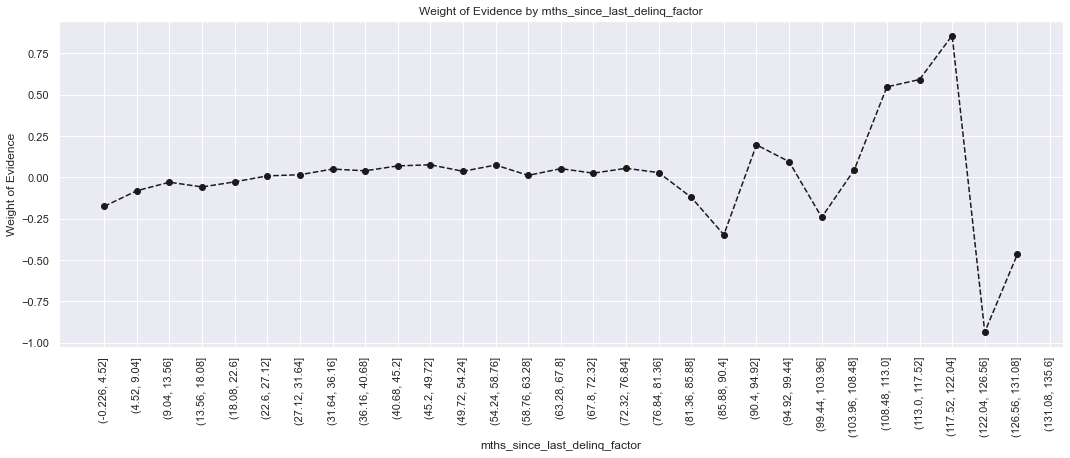

In [113]:
plot_by_woe(df_temp, 90)

In [114]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-20'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_delinq:20-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 20) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:50-80'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 50) & (df_inputs_prepr['mths_since_last_delinq'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=81'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 81), 1, 0)

#### mths_since_last_record

In [115]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-115-8da89b1d64fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.125, 2.5]",313,0.738019,0.004378,231.0,82.0,0.003834,0.007291,-0.642653,NaN,NaN,inf
1,"(2.5, 5.0]",217,0.797235,0.003035,173.0,44.0,0.002872,0.003912,-0.309249,0.059216,0.333403,inf
2,"(5.0, 7.5]",208,0.817308,0.002909,170.0,38.0,0.002822,0.003379,-0.180139,0.020073,0.129110,inf
3,"(7.5, 10.0]",352,0.829545,0.004923,292.0,60.0,0.004847,0.005335,-0.095942,0.012238,0.084197,inf
4,"(10.0, 12.5]",312,0.858974,0.004364,268.0,44.0,0.004448,0.003912,0.128446,0.029429,0.224388,inf
5,"(12.5, 15.0]",491,0.828921,0.006868,407.0,84.0,0.006756,0.007469,-0.100355,0.030054,0.228801,inf
6,"(15.0, 17.5]",301,0.850498,0.004210,256.0,45.0,0.004249,0.004001,0.060164,0.021578,0.160519,inf
7,"(17.5, 20.0]",550,0.840000,0.007693,462.0,88.0,0.007668,0.007824,-0.020123,0.010498,0.080287,inf
8,"(20.0, 22.5]",363,0.853994,0.005077,310.0,53.0,0.005145,0.004712,0.087929,0.013994,0.108052,inf
9,"(22.5, 25.0]",650,0.846154,0.009092,550.0,100.0,0.009129,0.008891,0.026397,0.007841,0.061532,inf


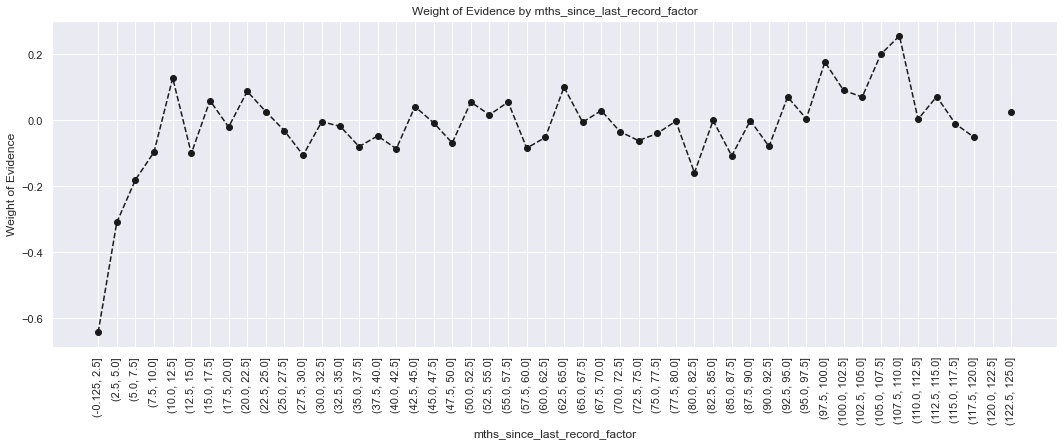

In [116]:
plot_by_woe(df_temp, 90)

In [117]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-37'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 37), 1, 0)
df_inputs_prepr['mths_since_last_record:37-60'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 37) & (df_inputs_prepr['mths_since_last_record'] <= 60), 1, 0)
df_inputs_prepr['mths_since_last_record:61-90'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 61) & (df_inputs_prepr['mths_since_last_record'] <= 90),1,0)
df_inputs_prepr['mths_since_last_record:>90'] = np.where((df_inputs_prepr['mths_since_last_record'] > 90), 1, 0)

## Preprocessing the Test Dataset

In [120]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [121]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')